In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import scipy.io
from scipy.signal import lfilter,butter,filtfilt
import itertools
from scipy.stats import pearsonr
from scipy.signal import welch
#import seaborn as sns

In [6]:
nic=scipy.io.loadmat('CircuitROIsMTS/LMP_NIC_20_FP_mean_denoisedTS.mat')
data = nic['mts'].T
print(data.shape)

(29, 3890)


In [7]:
roinames = nic["roi_names"].flatten()
for name in roinames:
    print(name[0])

ACC
L_Acb
L_Amygdala
L_Amygdala_CM_Juelich50
L_Amygdala_LB_Juelich50_minus_intersect
L_Amygdala_SF_Juelich50
L_Caudate
L_FOrb
L_Hipp
L_Insula
L_MidFG
L_Pallidum
L_Putamen
L_SN_Hammersn30r83_74
L_Thalamus
R_Acb
R_Amygdala
R_Amygdala_CM_Juelich50
R_Amygdala_LB_Juelich50_minus_intersect
R_Amygdala_SF_Juelich50
R_Caudate
R_FOrb
R_Hipp
R_Insula
R_MidFG
R_Pallidum
R_Putamen
R_SN_Hammersn30r83_75
R_Thalamus


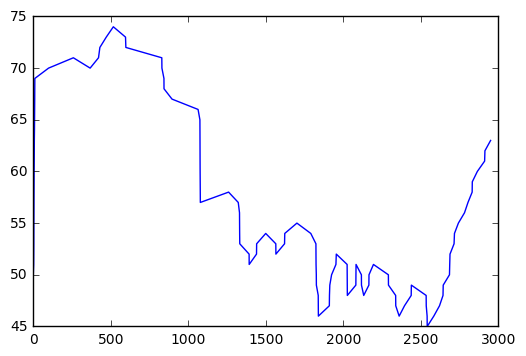

In [8]:
nict = scipy.io.loadmat('CircuitROIsMTS/LMP_NIC_20-FP/09-Jun-2017_09-33_LMP_NIC_20_FP.mat')
craving = nict['craveUpdate']
crav_t=(craving[0][0][0].T).flatten()
crav_v=(craving[0][0][1].T).flatten()
plt.plot(crav_t,crav_v)

In [9]:
# create a 10th order Butterworth filter from 0.01 to 0.1 Hz
def butter_bandpass(lowcut,highcut,fs,order=8):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq

    b,a = butter(order, [low, high], btype='band')
    return b,a

def butter_bandpass_filter(data,lowcut,highcut,fs,order=5):
    b,a = butter_bandpass(lowcut,highcut,fs,order=order)
    return filtfilt(b,a,data)

# create a 10th order Butterworth filter from 0.01 to 0.1 Hz
def butter_lowpass(lowcut,fs,order=8):
    nyq = 0.5*fs
    low = lowcut/nyq

    b,a = butter(order, low, btype='low')
    return b,a

def butter_lowpass_filter(data,lowcut,fs,order=5):
    b,a = butter_lowpass(lowcut,fs,order=order)
    return filtfilt(b,a,data)

sampling_freq = 1/0.802
print(sampling_freq)

1.2468827930174562


[ 316  556  796 1036 1276 1516 1756 1996 2236 2476]


/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


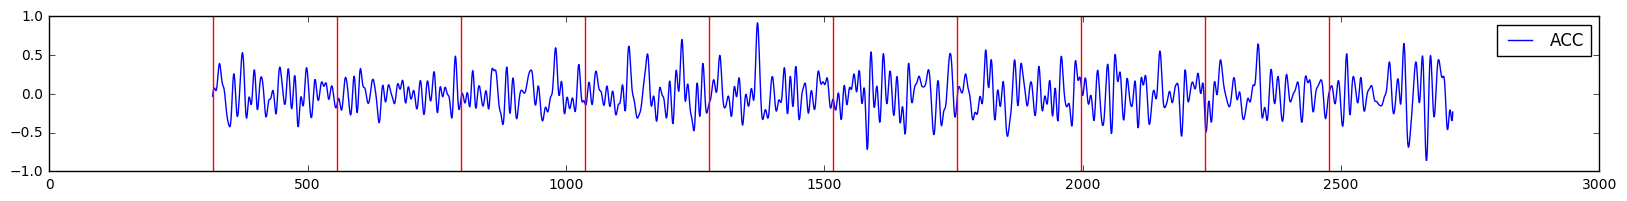

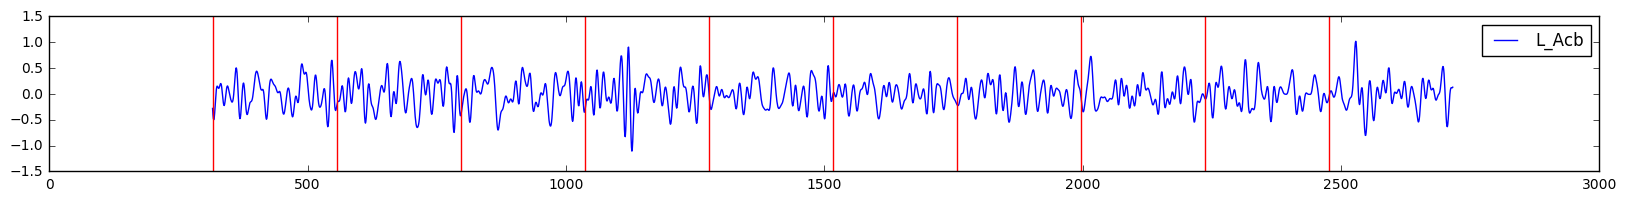

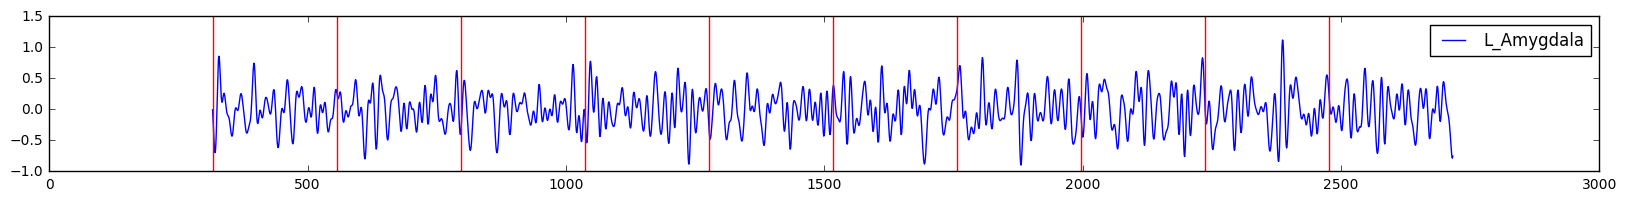

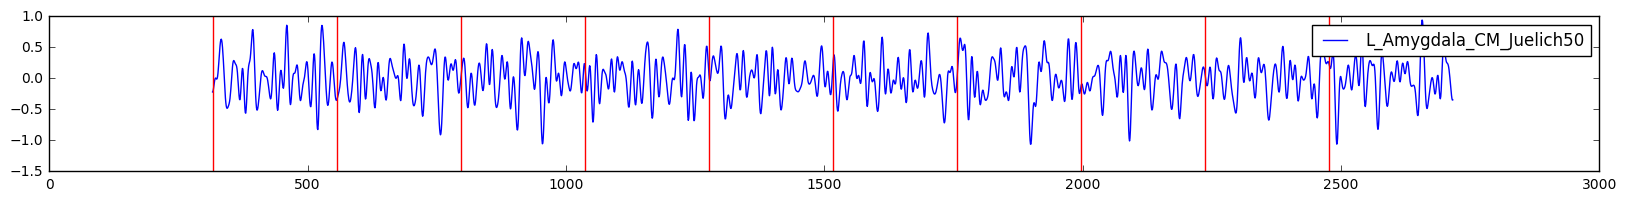

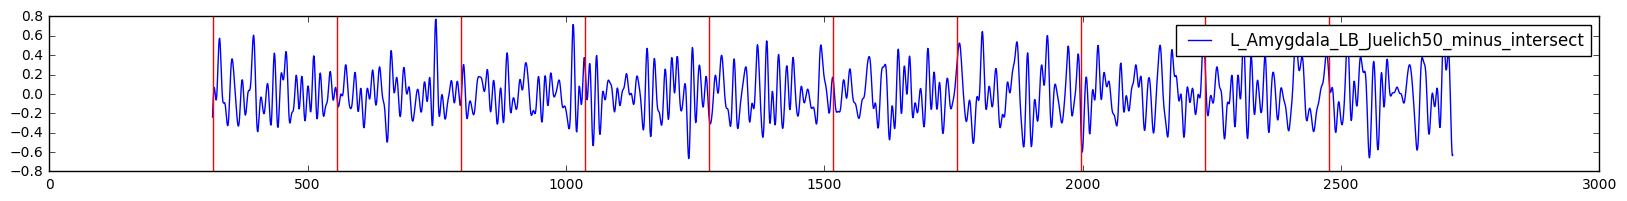

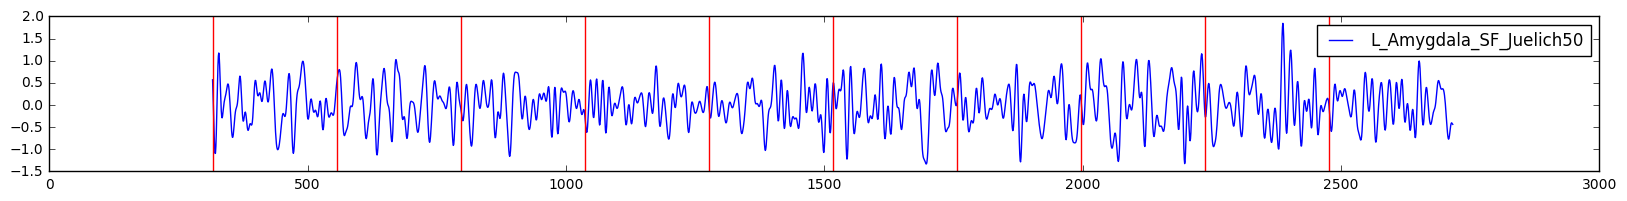

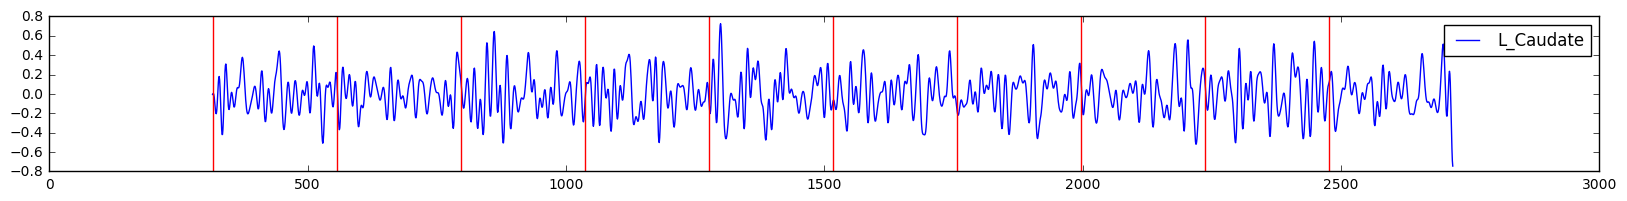

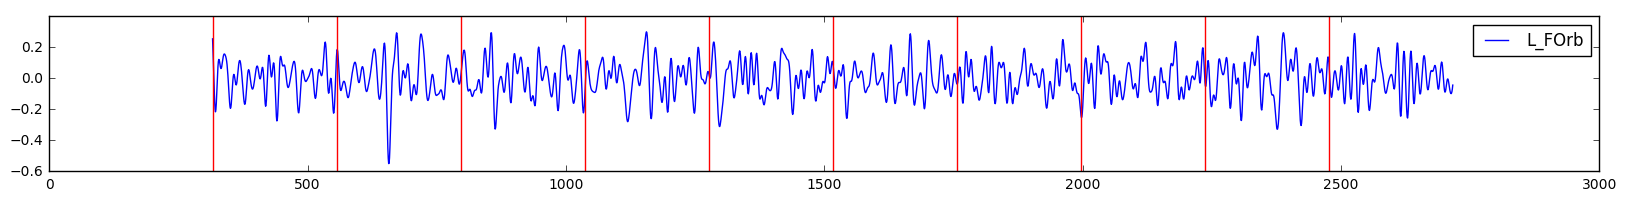

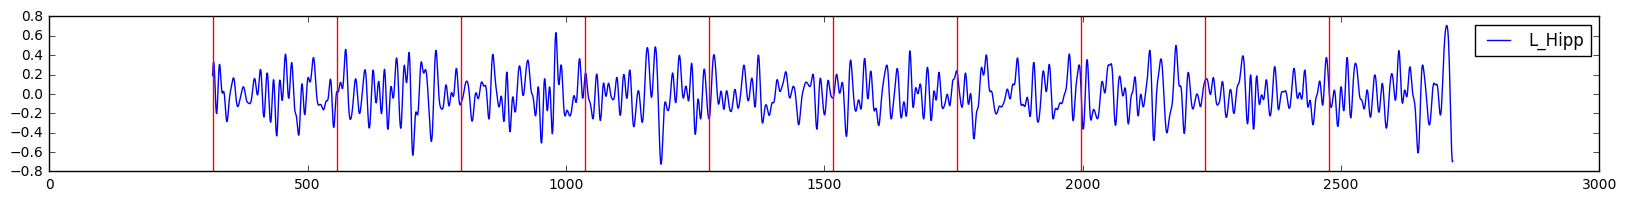

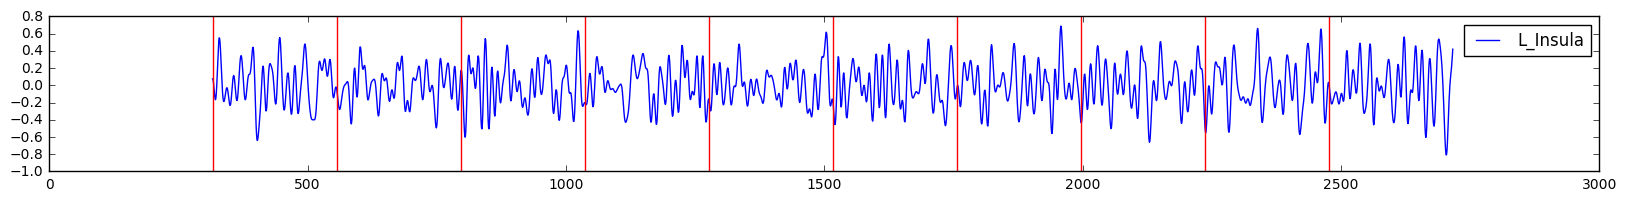

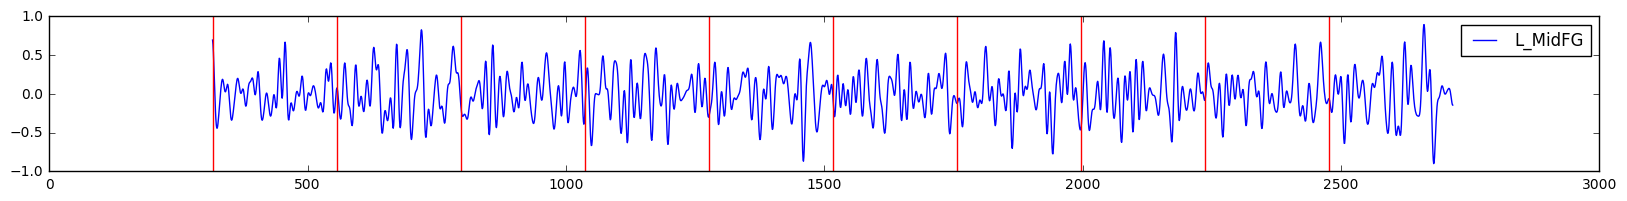

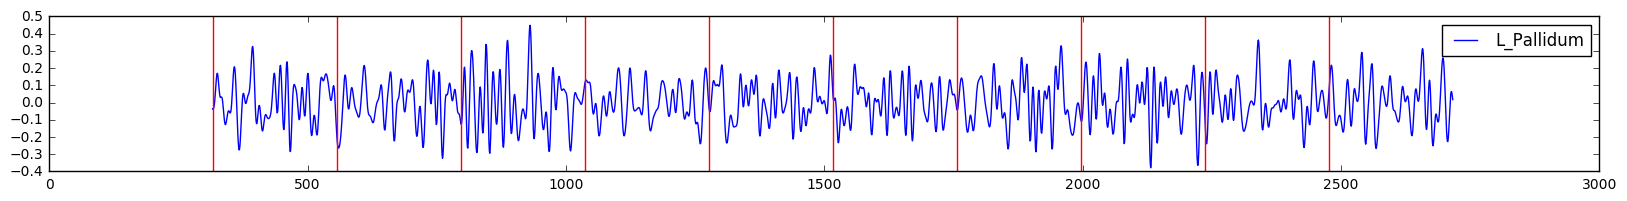

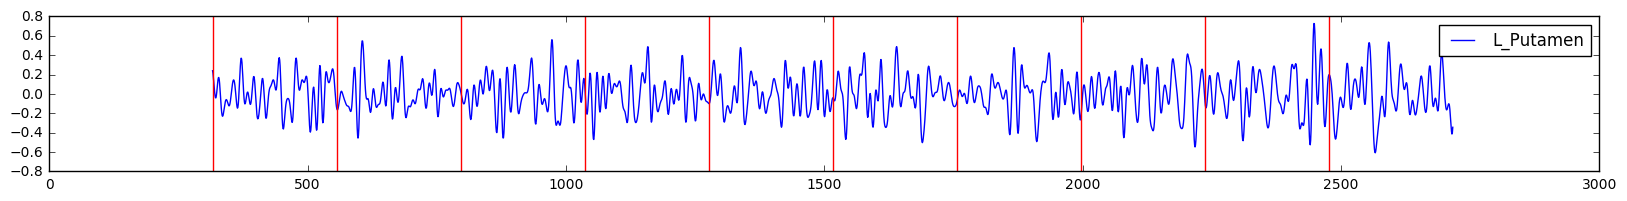

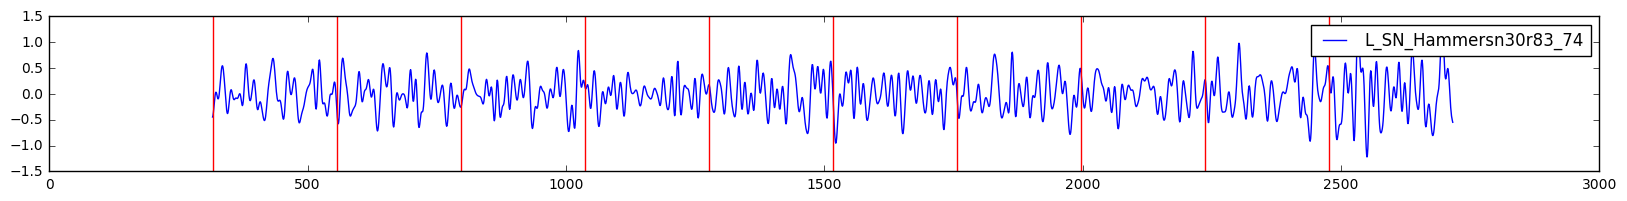

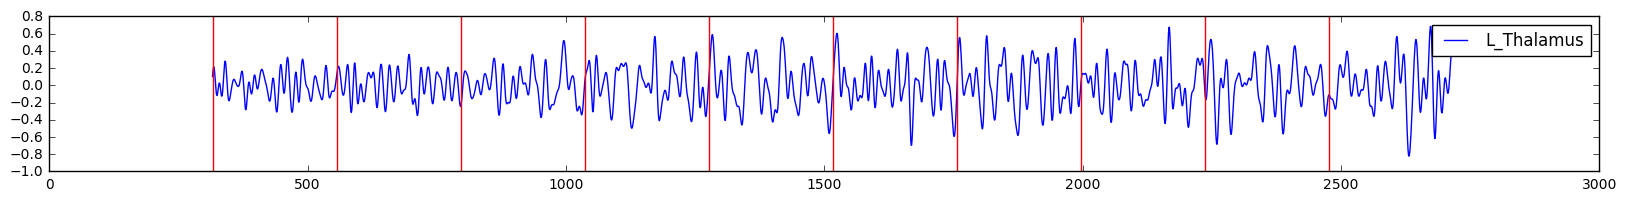

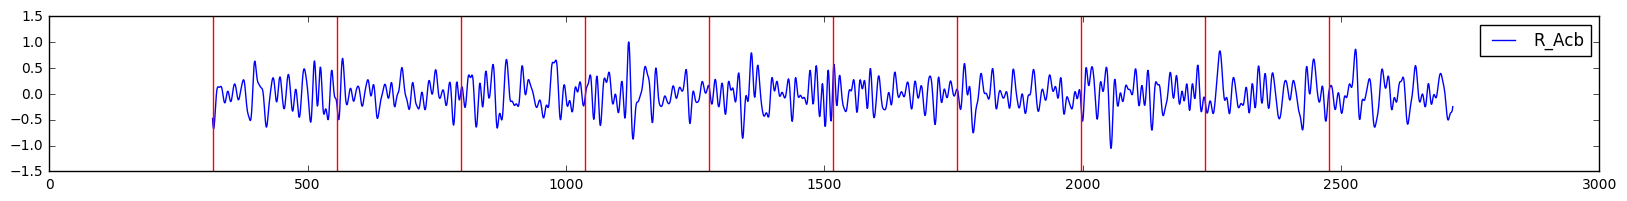

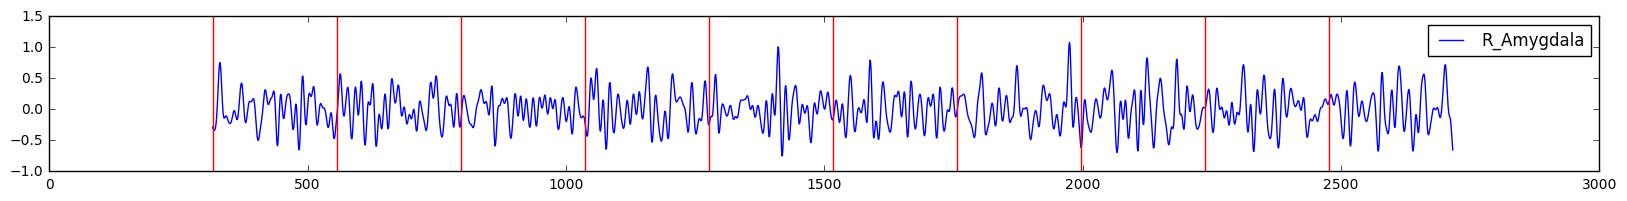

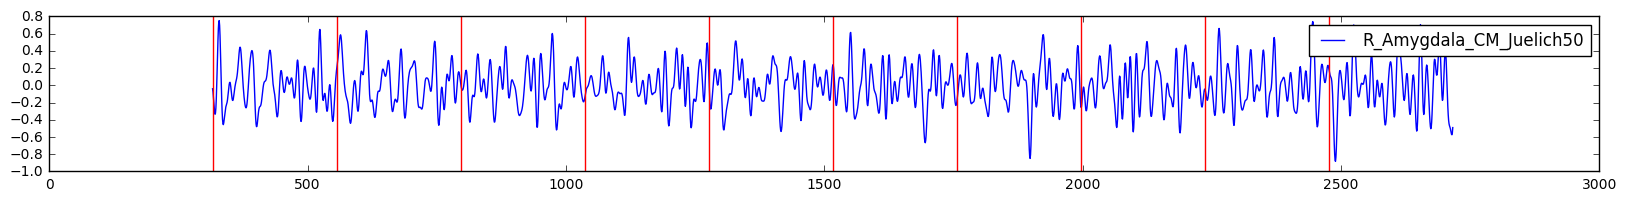

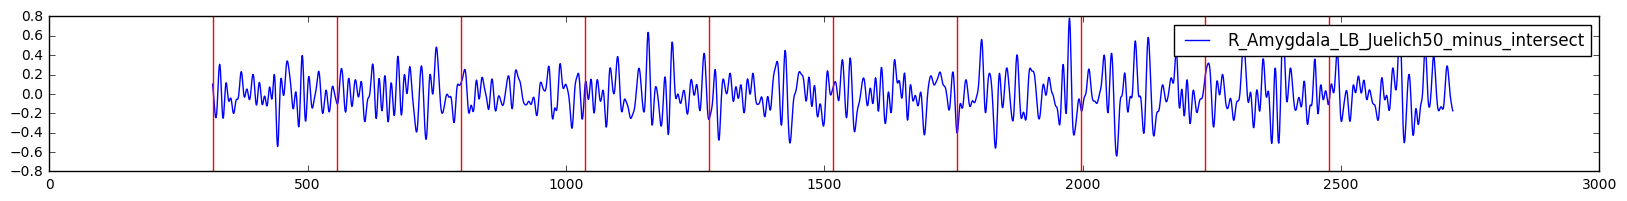

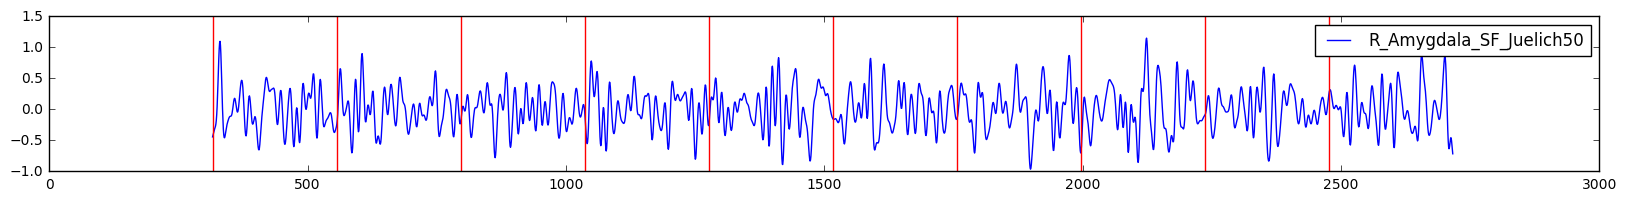

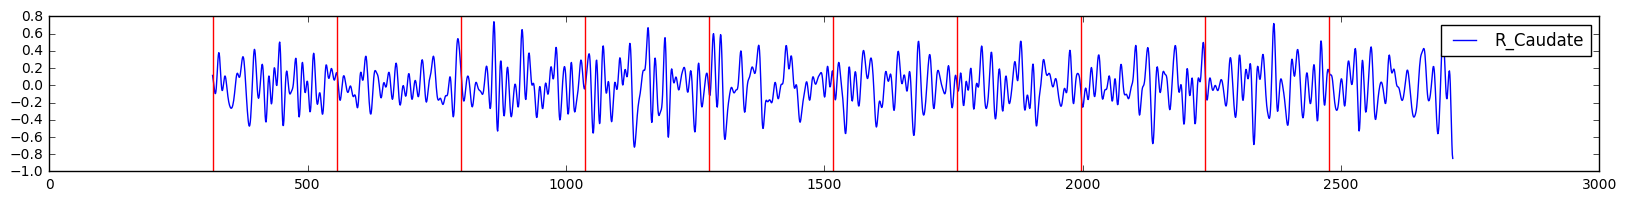

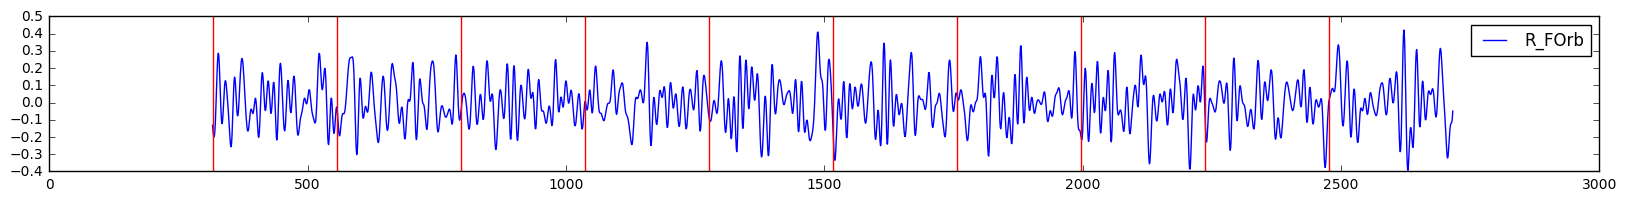

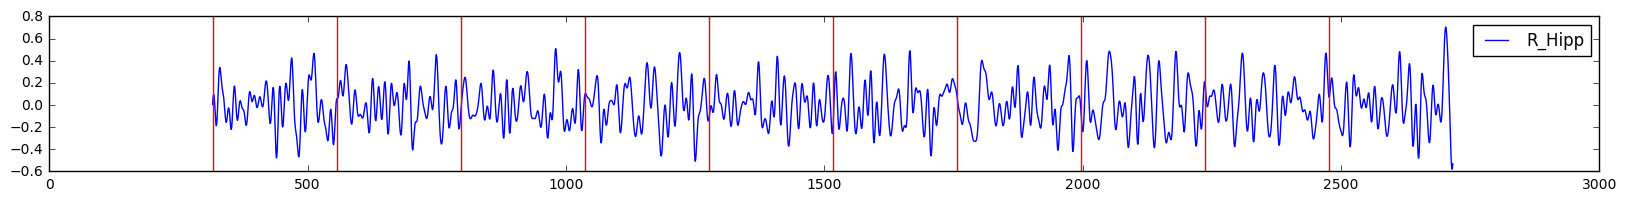

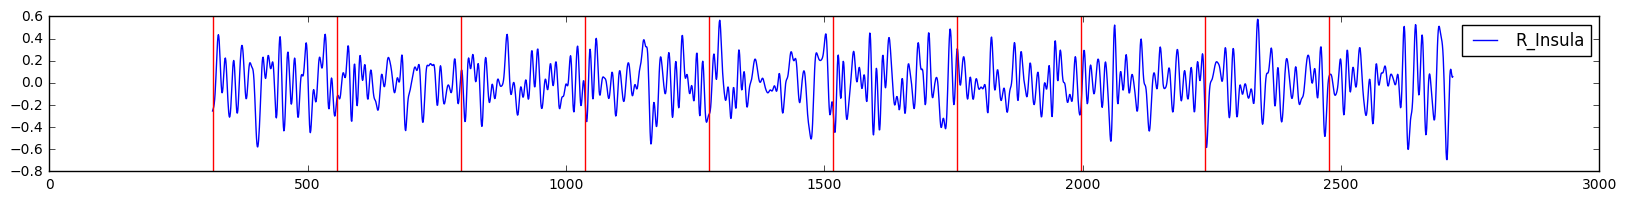

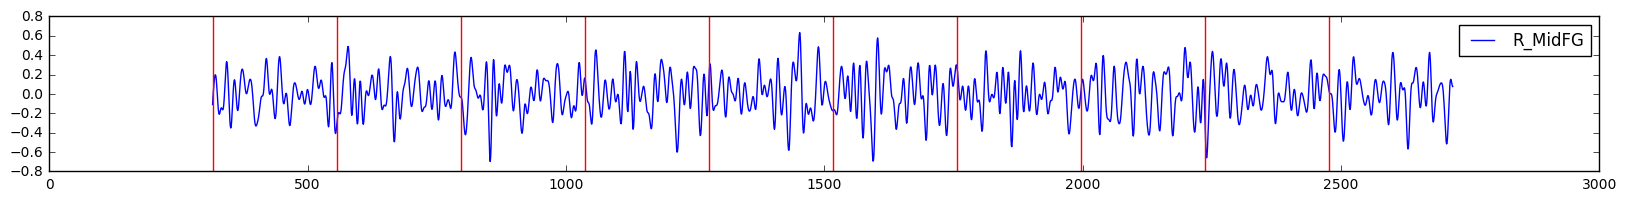

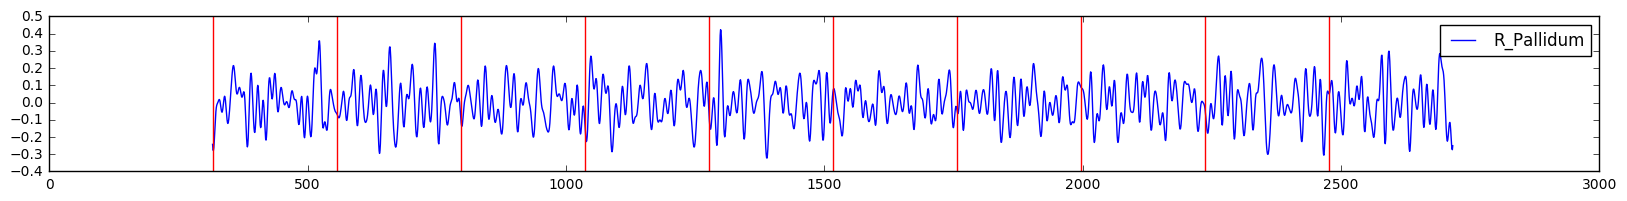

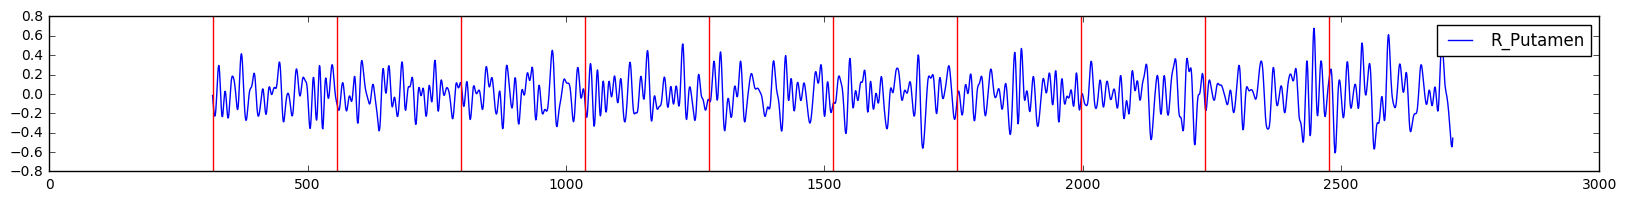

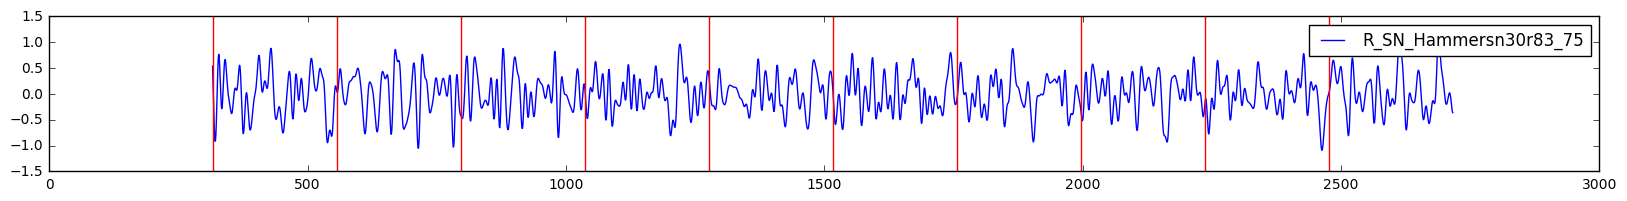

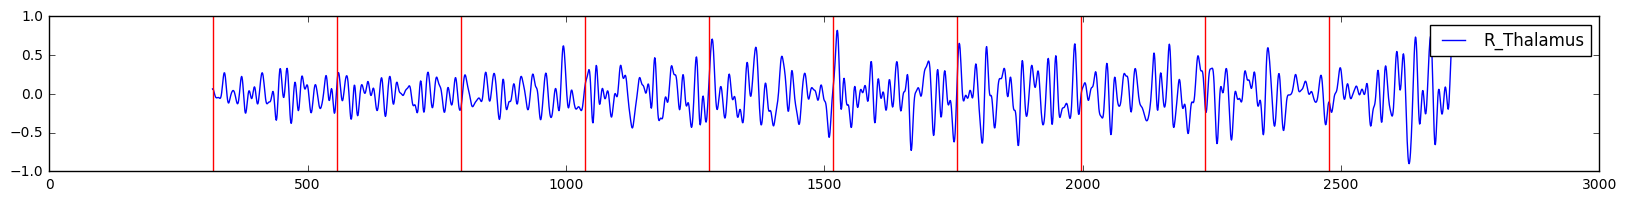

In [10]:
# comment about the indexing:
# the puffs start at second 316 and then happen every 4min = 240sec
# 316/0.802 = 394
# 2400/0.802 = 2992.52
t = np.linspace(0,3889*.802,3890)
data_filtered = None
puffs=np.arange(316,2500,240)
print(puffs)
for trace,name in zip(data,roinames):
    trace_filtered = butter_bandpass_filter(trace,0.01,0.1,sampling_freq,order=5)
    plt.figure(figsize=(20,2))
    plt.plot(t[394:394+2994],trace_filtered[394:394+2994],label=name[0])
#    plt.xlim((0,1000))
    for p in puffs:
        plt.axvline(x=p,color="r")
    plt.legend()
    if data_filtered is None:
        data_filtered = trace_filtered
    else:
        data_filtered = np.vstack((data_filtered,trace_filtered))

In [11]:
data_filtered.shape

(29, 3890)

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


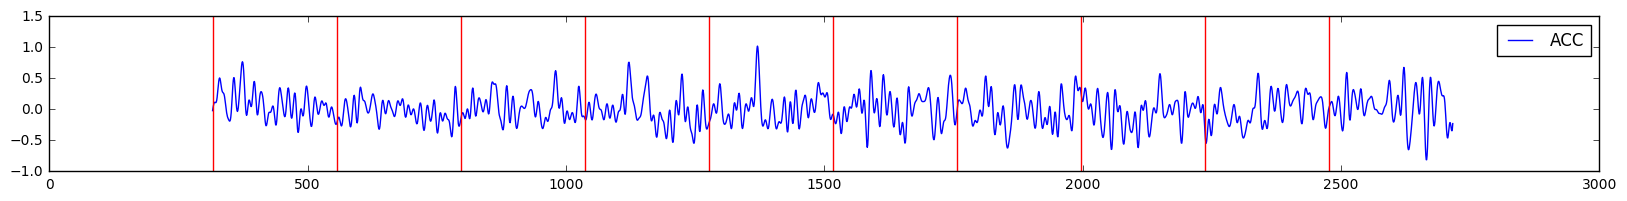

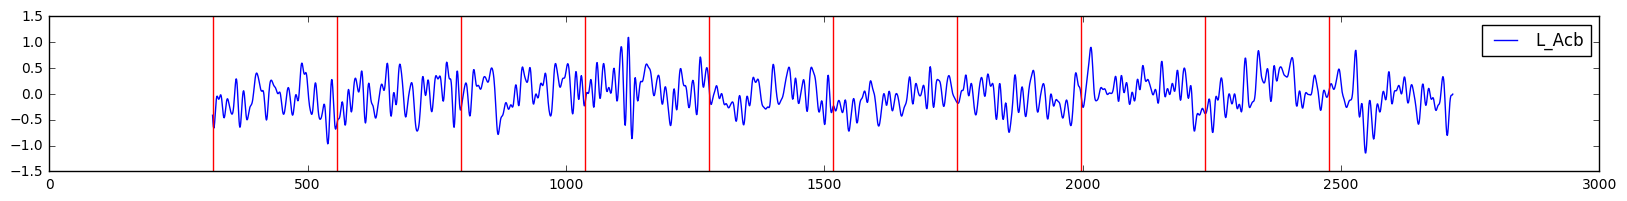

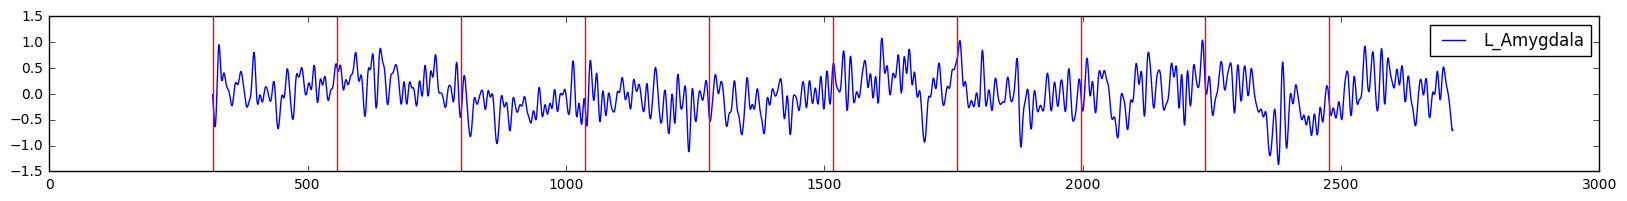

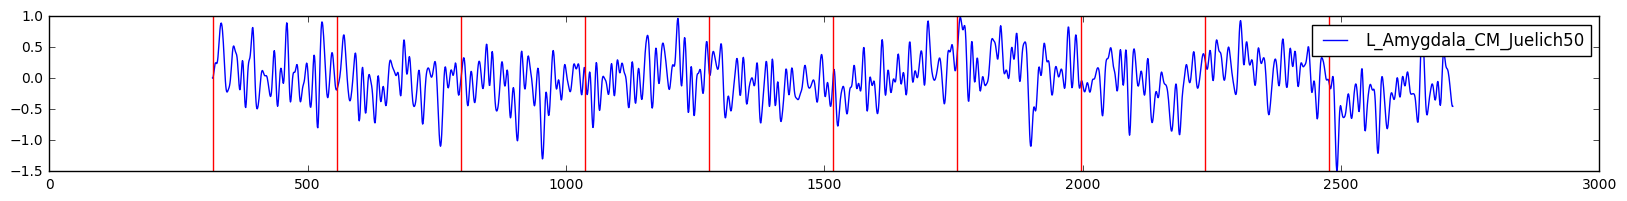

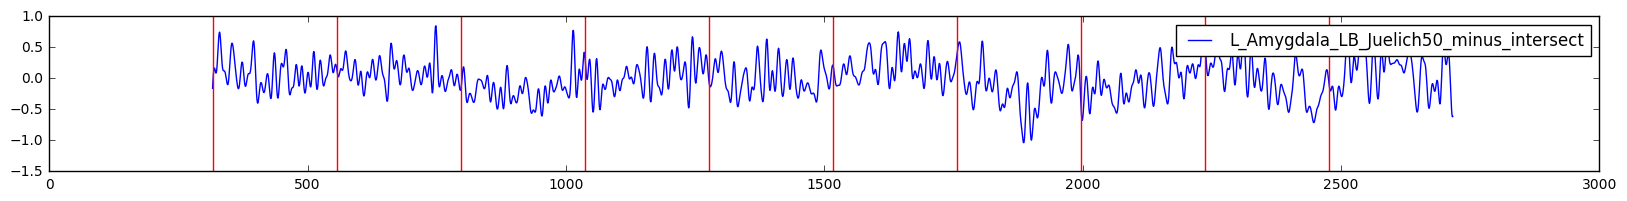

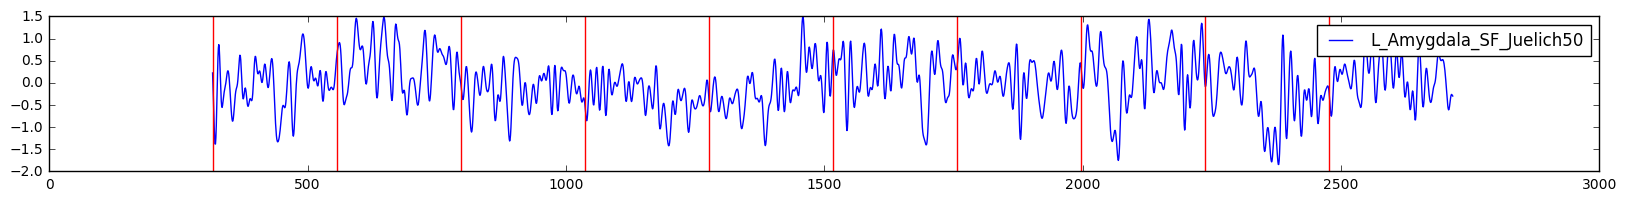

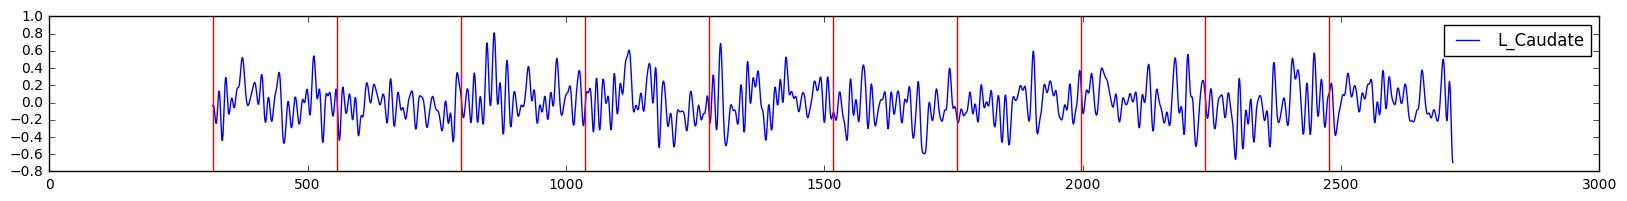

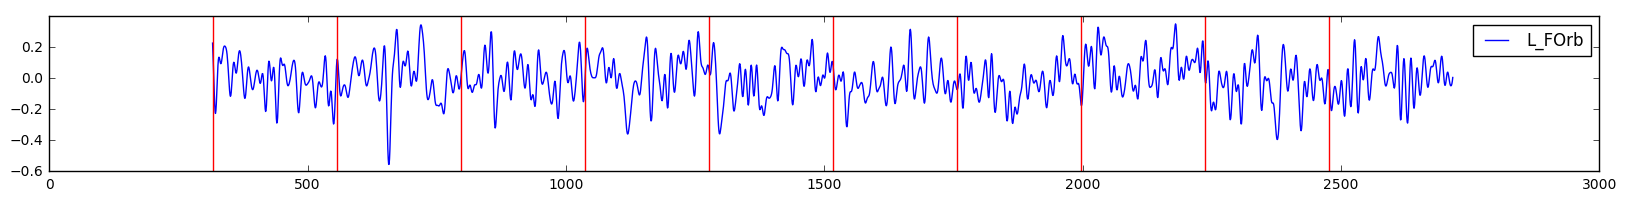

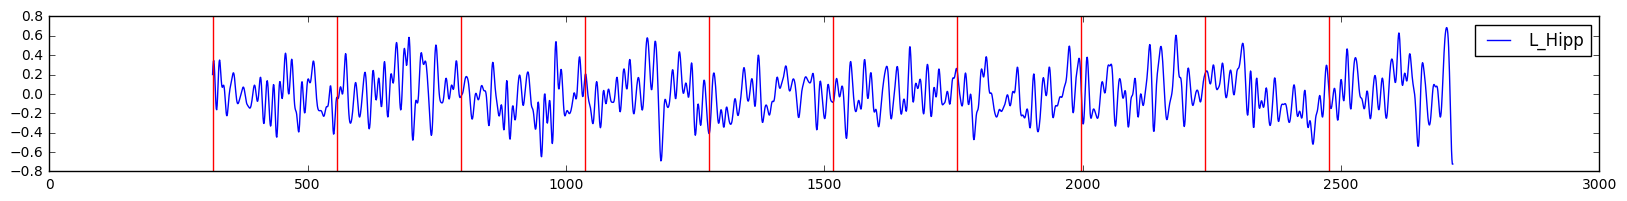

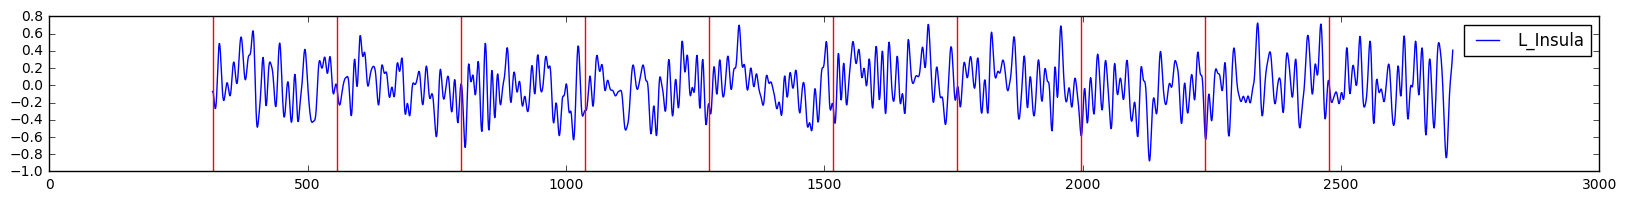

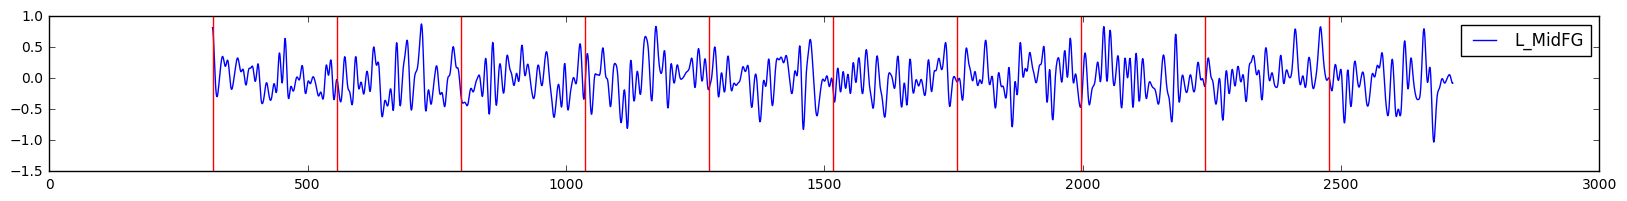

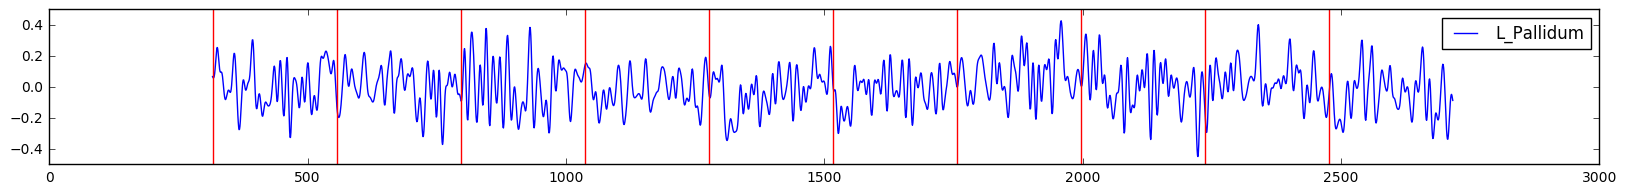

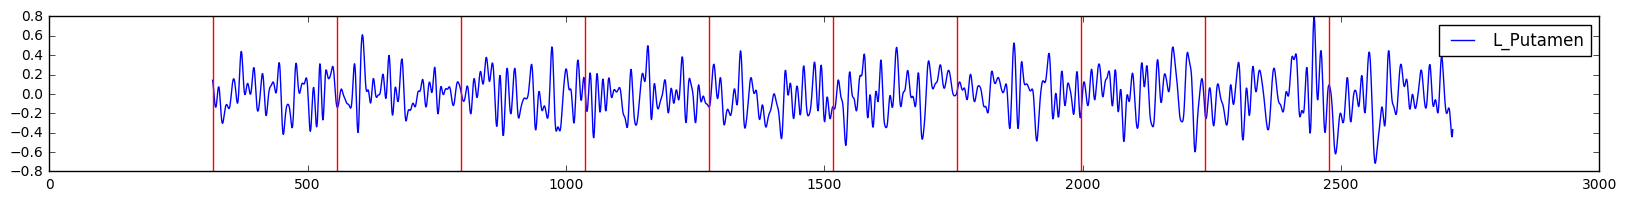

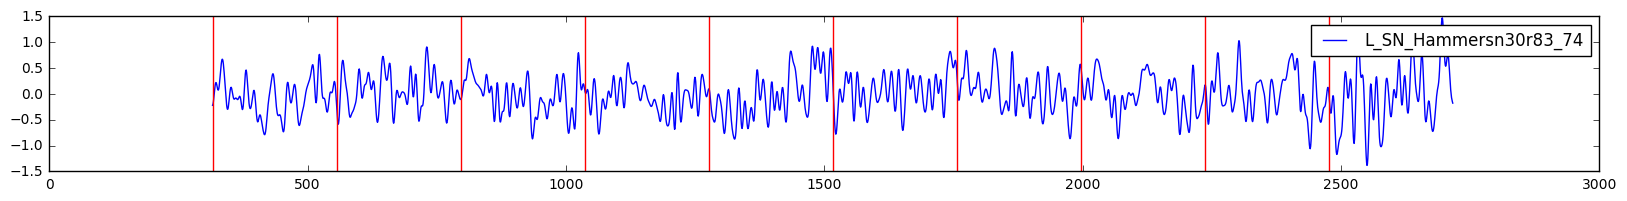

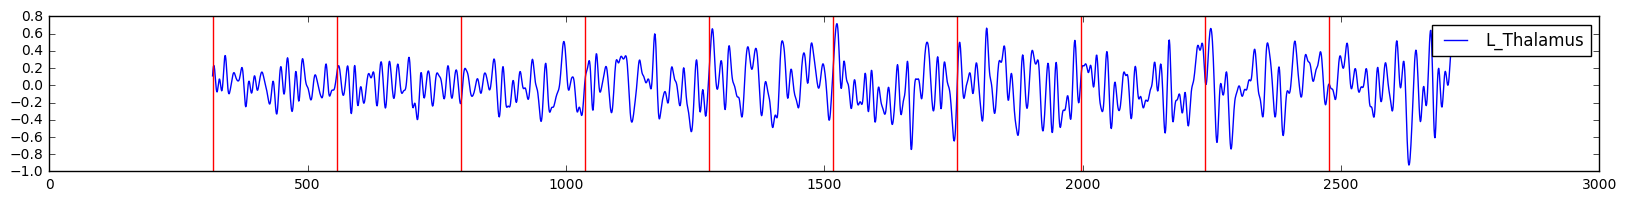

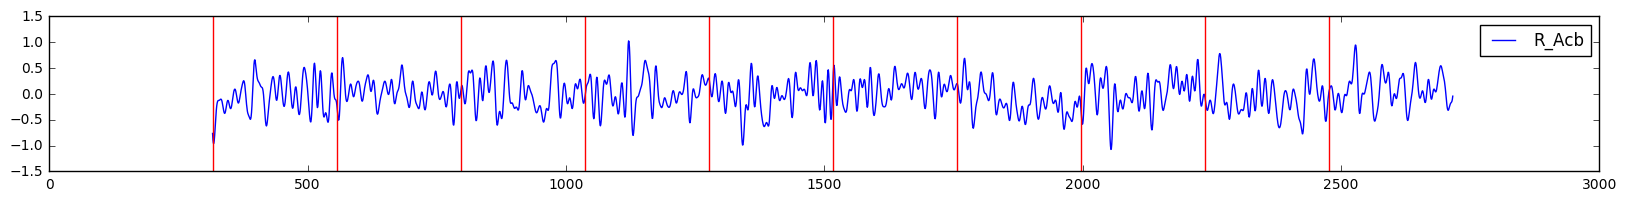

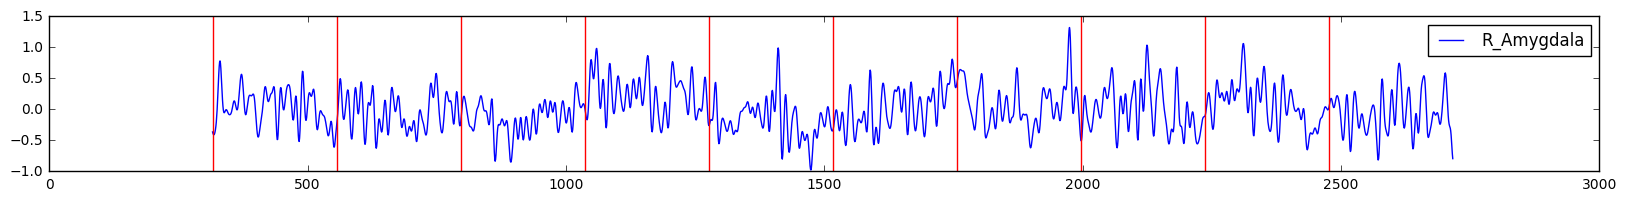

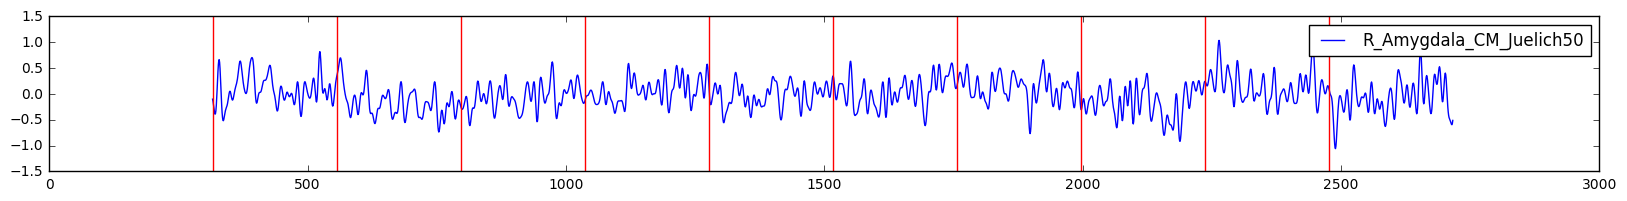

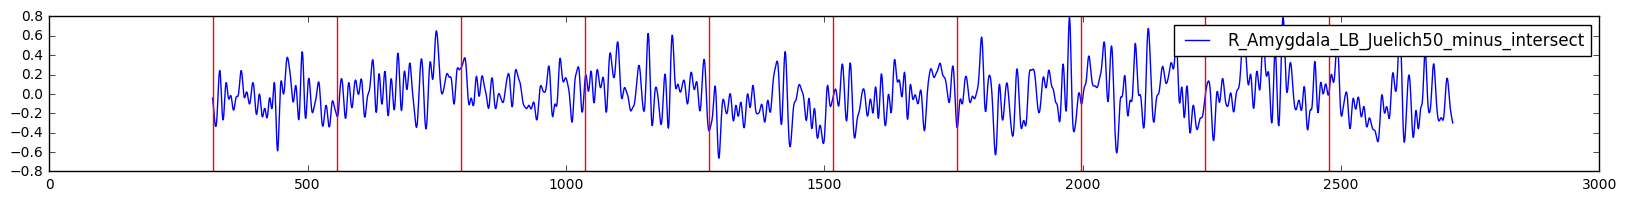

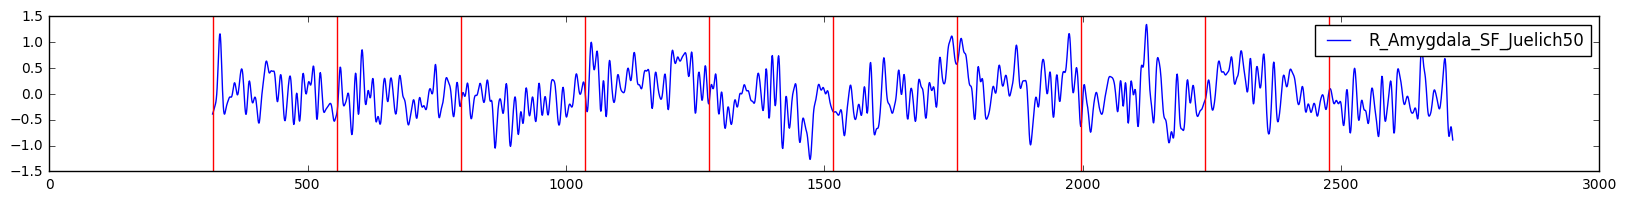

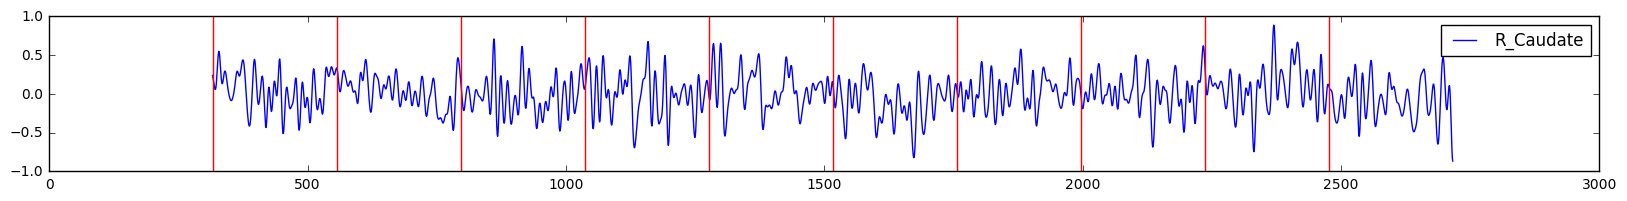

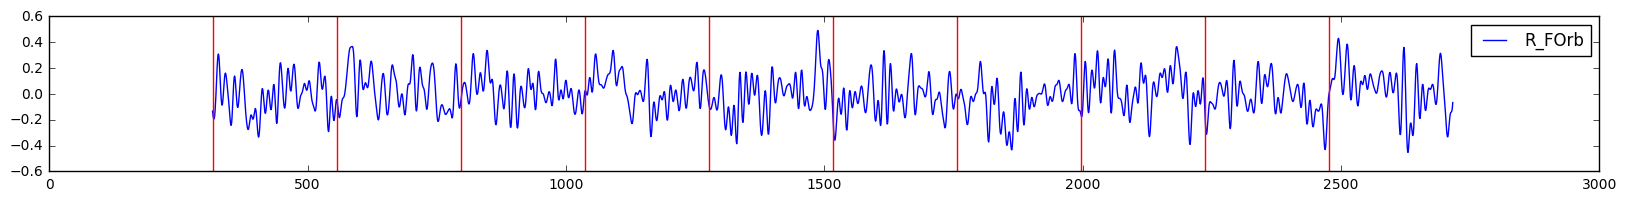

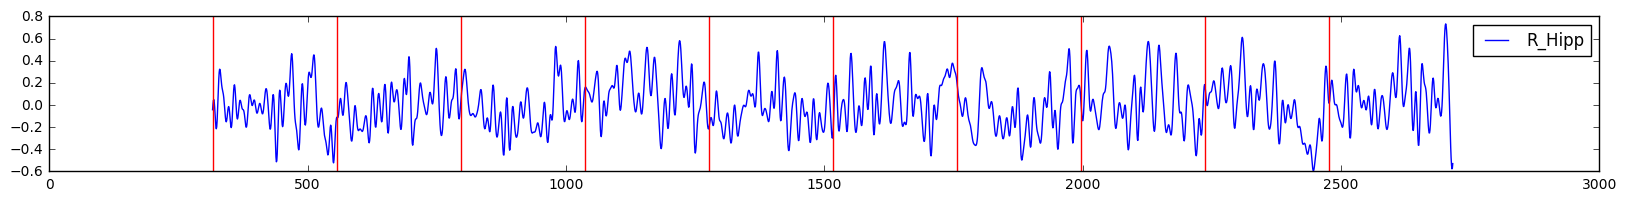

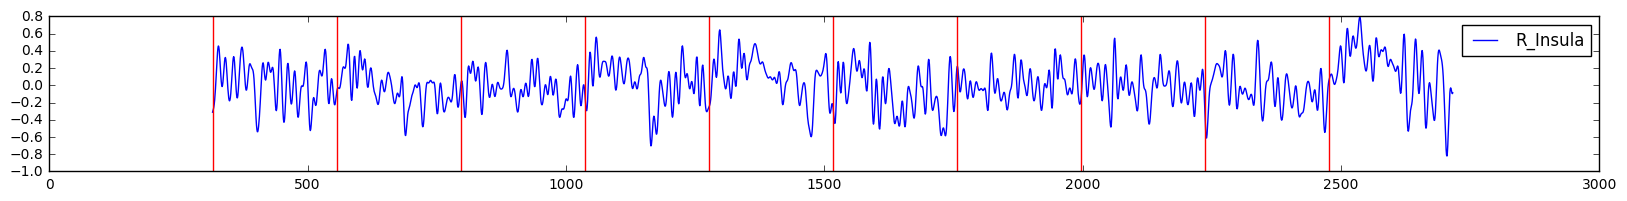

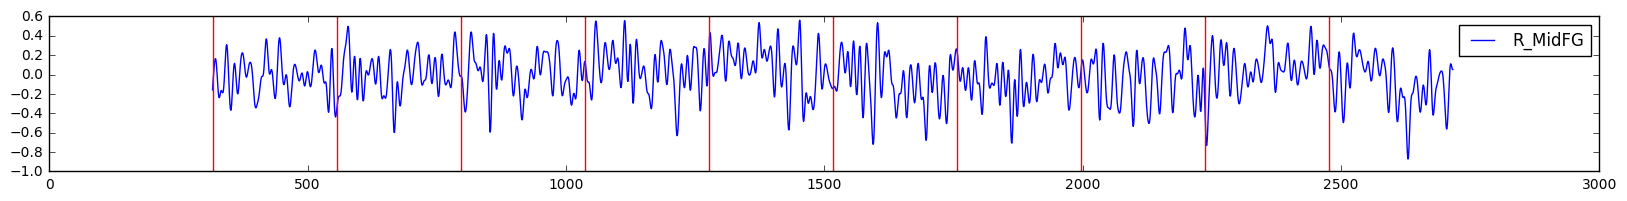

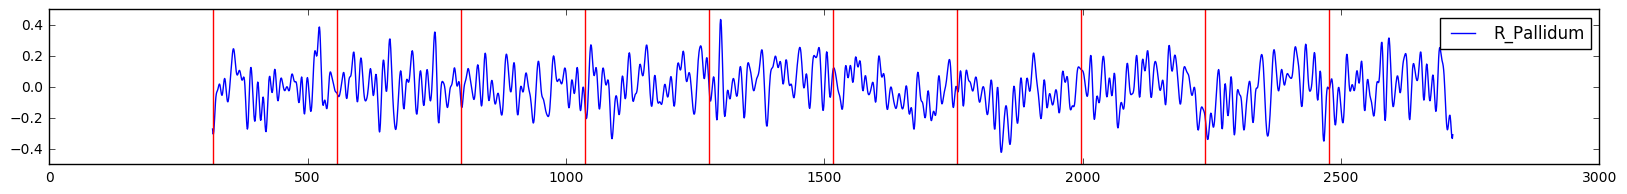

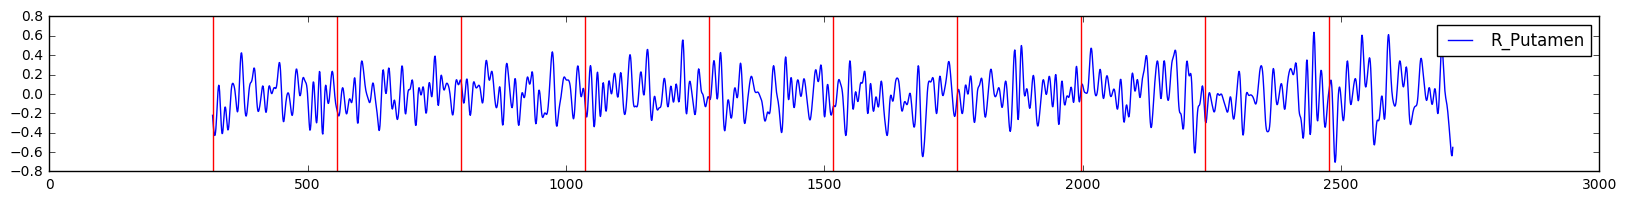

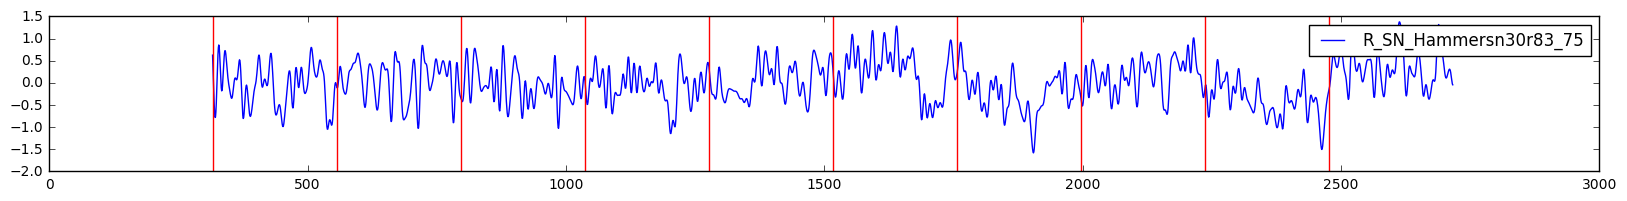

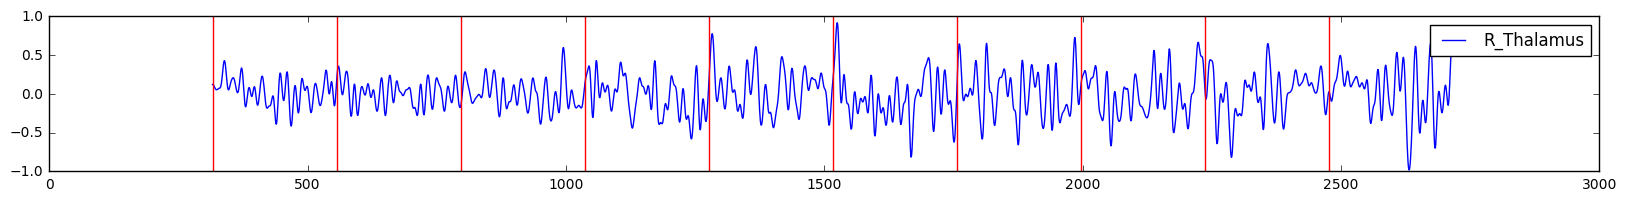

In [12]:
# comment about the indexing:
# the puffs start at second 316 and then happen every 4min = 240sec
# 316/0.802 = 394
# 2400/0.802 = 2992.52
data_filtered_low = None
for trace,name in zip(data,roinames):
    trace_filtered_low = butter_lowpass_filter(trace,0.1,sampling_freq,order=5)
    plt.figure(figsize=(20,2))
    plt.plot(t[394:394+2994],trace_filtered_low[394:394+2994],label=name[0])
#    plt.xlim((0,1000))
    for p in puffs:
        plt.axvline(x=p,color="r")
    plt.legend()
    if data_filtered_low is None:
        data_filtered_low = trace_filtered_low
    else:
        data_filtered_low = np.vstack((data_filtered_low,trace_filtered_low))

In [13]:
def pearson_combined(data):
    results = None
    for perm in itertools.combinations(range(data.shape[0]),2):
        pc=pearsonr(data[perm[0]],data[perm[1]])
        result=np.array([perm[0],perm[1],pc[0],pc[1]])
        if results is None:
            results = result
        else:
            results = np.vstack((results,result))
    return results
results_array = pearson_combined(data_filtered)

In [14]:
sorted_results=results_array[results_array[:,2].argsort()[::-1]]

In [15]:
for i,j,pr,pp in sorted_results:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

14.0 28.0 ['L_Thalamus'] ['R_Thalamus'] 0.914167737034 0.0
12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.843839794964 0.0
16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.794922626418 0.0
8.0 22.0 ['L_Hipp'] ['R_Hipp'] 0.775109491049 0.0
9.0 23.0 ['L_Insula'] ['R_Insula'] 0.716497434017 0.0
6.0 20.0 ['L_Caudate'] ['R_Caudate'] 0.706744266708 0.0
2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.672829978108 0.0
16.0 22.0 ['R_Amygdala'] ['R_Hipp'] 0.610118378773 0.0
16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.59626410862 0.0
0.0 23.0 ['ACC'] ['R_Insula'] 0.573730638076 0.0
6.0 26.0 ['L_Caudate'] ['R_Putamen'] 0.555744082184 3.08095996616e-314
2.0 4.0 ['L_Amygdala'] ['L_Amygdala_LB_Juelich50_minus_intersect'] 0.554274308026 3.02277803574e-312
20.0 26.0 ['R_Caudate'] ['R_Putamen'] 0.529179420888 1.003104299e-279
0.0 9.0 ['ACC'] ['L_Insula'] 0.512629659665 9.89037137325e-260
6.0 12.0 ['L_Caudate'] ['L_Putamen'] 0.499258587833 2.29643780559e-244
4.0 8.0 ['L_Amy

In [16]:
def sliding_window_pearson(data1,data2,window_size,step=1):
    pr = [pearsonr(data1[index:index+window_size],data2[index:index+window_size])[0]
          for index in range(0,min(data1.size,data2.size),step)]
    pr = np.array(pr)
    return pr

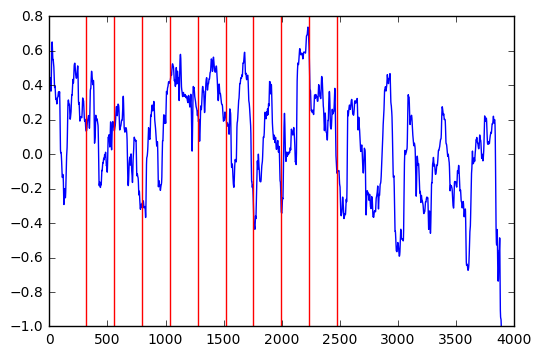

In [17]:
plt.plot(sliding_window_pearson(data_filtered[15],data_filtered[22],100))
for p in puffs:
    plt.axvline(x=p,color="r")


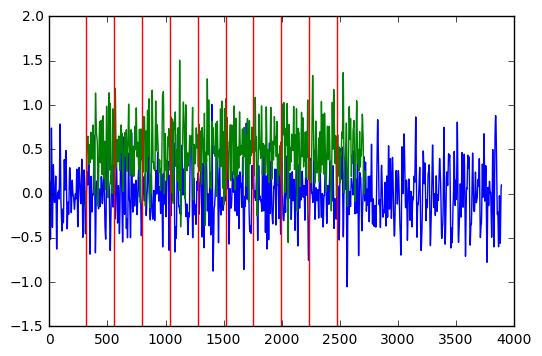

In [18]:
# new strategy:
# we compare pearson correlations of the puffs to r's from time where there is no delivery
# two time series: puffs from first puff to 2min after last puff
# nopuffs - the rest
plt.plot(range(data_filtered[15].size),data_filtered[15])
plt.plot(t[394:394+2994],data_filtered[15][394:394+2994]+0.5)
for p in puffs:
    plt.axvline(x=p,color="r")



In [19]:
data_puffs = data_filtered[:,394:394+2994]
data_nopuffs1=data_filtered[:,:394]
data_nopuffs2=data_filtered[:,394+2994:]
data_nopuffs=np.hstack((data_nopuffs1,data_nopuffs2))
print(data_puffs.shape, data_nopuffs.shape)
print(data_puffs.shape[1]+data_nopuffs.shape[1])

(29, 2994) (29, 896)
3890


In [20]:
results_puffs = pearson_combined(data_puffs)
sorted_results_puffs=results_puffs[results_puffs[:,2].argsort()[::-1]]
for i,j,pr,pp in sorted_results_puffs:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

14.0 28.0 ['L_Thalamus'] ['R_Thalamus'] 0.917420054717 0.0
12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.834979936349 0.0
16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.808649103108 0.0
8.0 22.0 ['L_Hipp'] ['R_Hipp'] 0.783724373892 0.0
9.0 23.0 ['L_Insula'] ['R_Insula'] 0.728086835267 0.0
2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.682090903008 0.0
6.0 20.0 ['L_Caudate'] ['R_Caudate'] 0.671888485867 0.0
16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.590186793409 1.54050929596e-280
16.0 22.0 ['R_Amygdala'] ['R_Hipp'] 0.589069438666 3.16820815249e-279
0.0 23.0 ['ACC'] ['R_Insula'] 0.586117291729 8.82438511453e-276
2.0 4.0 ['L_Amygdala'] ['L_Amygdala_LB_Juelich50_minus_intersect'] 0.575482671724 1.16397008461e-263
6.0 26.0 ['L_Caudate'] ['R_Putamen'] 0.550686380336 4.57852222301e-237
20.0 26.0 ['R_Caudate'] ['R_Putamen'] 0.538160991243 1.84202015548e-224
0.0 9.0 ['ACC'] ['L_Insula'] 0.52237217768 2.59895290596e-209
21.0 23.0 ['R_FOrb'] ['R_Insula'] 0.515

In [21]:
results_nopuffs = pearson_combined(data_nopuffs)
sorted_results_nopuffs=results_nopuffs[results_nopuffs[:,2].argsort()[::-1]]
for i,j,pr,pp in sorted_results_nopuffs:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

14.0 28.0 ['L_Thalamus'] ['R_Thalamus'] 0.901767212104 0.0
12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.870574762446 1.35370984826e-277
6.0 20.0 ['L_Caudate'] ['R_Caudate'] 0.804589842162 1.4958034581e-204
16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.749960049906 1.24312511724e-162
8.0 22.0 ['L_Hipp'] ['R_Hipp'] 0.749667045777 1.94773877689e-162
16.0 22.0 ['R_Amygdala'] ['R_Hipp'] 0.678691045705 5.62797747018e-122
9.0 23.0 ['L_Insula'] ['R_Insula'] 0.672608926677 4.89754644352e-119
2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.645472813196 9.79242290212e-107
16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.622158915344 3.9850733932e-97
6.0 12.0 ['L_Caudate'] ['L_Putamen'] 0.573657828315 1.53949508046e-79
6.0 26.0 ['L_Caudate'] ['R_Putamen'] 0.570943225396 1.220109118e-78
25.0 26.0 ['R_Pallidum'] ['R_Putamen'] 0.55208275083 1.28057772006e-72
4.0 16.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['R_Amygdala'] 0.550986227855 2.79076281323e-72
4.0 8.0 ['L_

In [22]:
print(results_puffs.shape)

(406, 4)


In [23]:
results_diffp = results_puffs[:,2]-results_nopuffs[:,2]
results_diff = np.vstack((results_puffs.T,results_diffp)).T
print(results_diff.shape)

(406, 5)


In [24]:
sorted_results_diff=results_diff[results_diff[:,4].argsort()[::-1]]
for i,j,pr,pp,pd in sorted_results_diff:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp,pd)

13.0 27.0 ['L_SN_Hammersn30r83_74'] ['R_SN_Hammersn30r83_75'] 0.274721871171 5.49058280184e-53 0.427782262921
5.0 18.0 ['L_Amygdala_SF_Juelich50'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.382592955707 5.67754530815e-105 0.394394826947
13.0 17.0 ['L_SN_Hammersn30r83_74'] ['R_Amygdala_CM_Juelich50'] 0.162057938683 4.54907994435e-19 0.277182405494
9.0 13.0 ['L_Insula'] ['L_SN_Hammersn30r83_74'] 0.131521086221 5.01478769681e-13 0.262819962702
2.0 18.0 ['L_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.386658013802 2.31834519574e-107 0.253278730463
13.0 25.0 ['L_SN_Hammersn30r83_74'] ['R_Pallidum'] 0.238941304616 3.8789943149e-40 0.245252535848
5.0 7.0 ['L_Amygdala_SF_Juelich50'] ['L_FOrb'] 0.252790946001 7.1593991924e-45 0.231408266686
0.0 13.0 ['ACC'] ['L_SN_Hammersn30r83_74'] 0.192239818745 2.57566232855e-26 0.230379039603
4.0 15.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['R_Acb'] 0.0554239302456 0.00241556912756 0.230137338405
11.0 23.0 ['L_Pallidum'] ['R_Insula'] 0.2

In [25]:
# now we want to look at the unfiltered data and look at the powerspectrum
data_puffs_nofilter = data[:,394:394+2994]

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


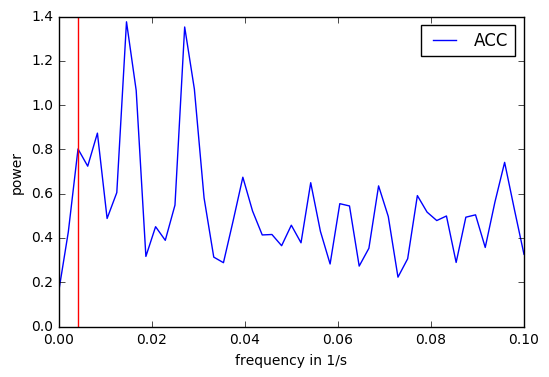

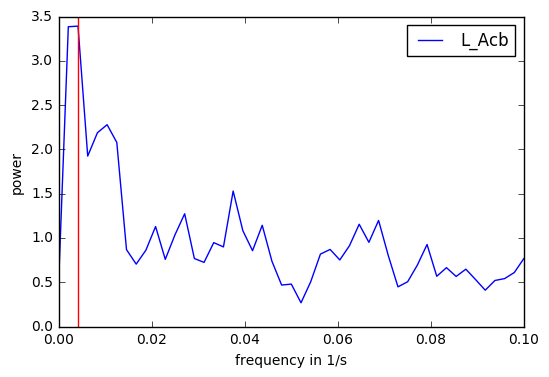

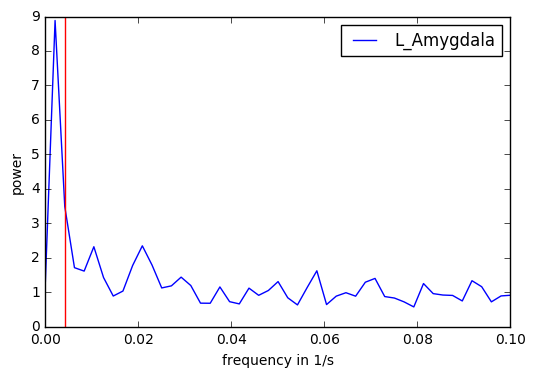

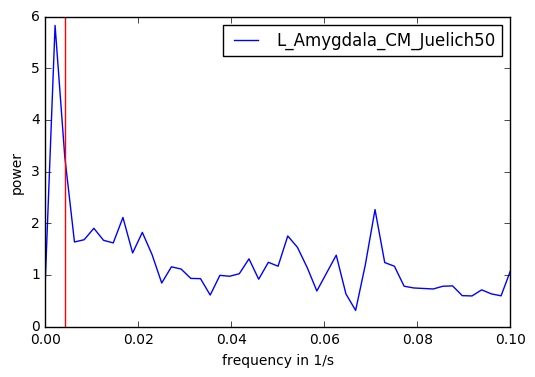

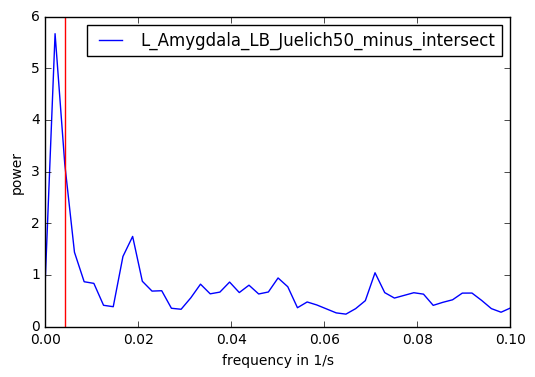

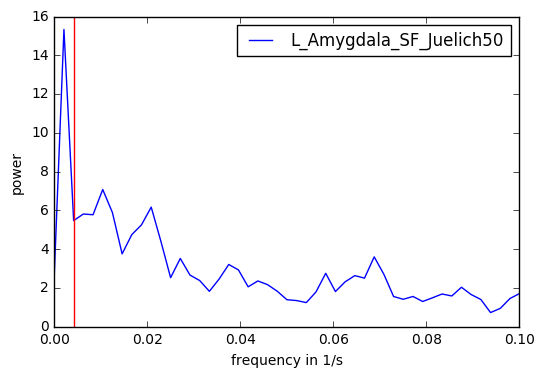

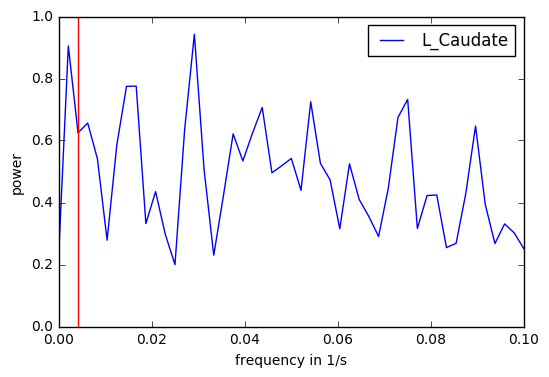

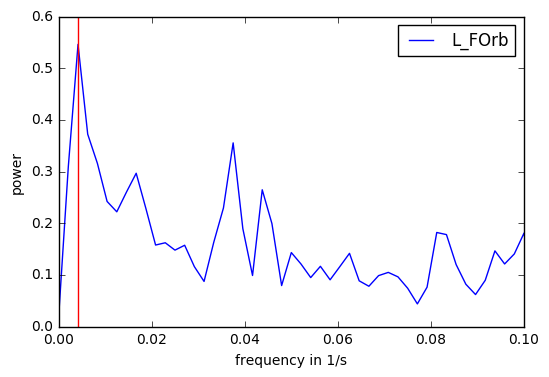

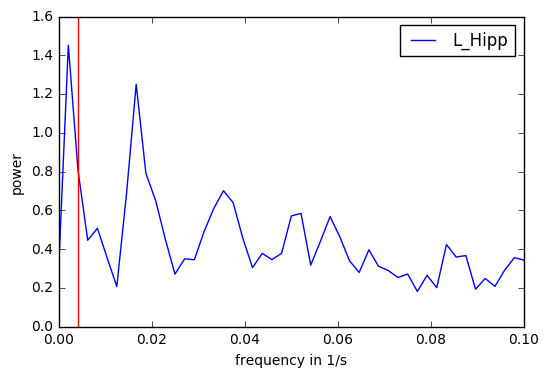

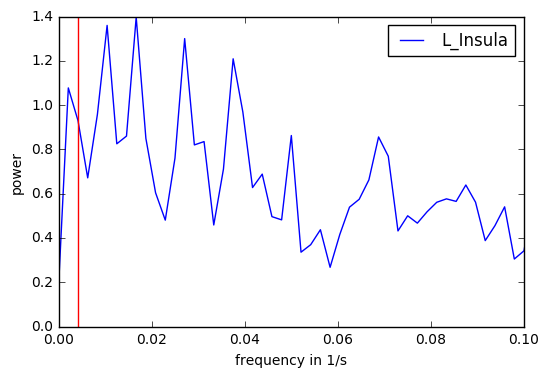

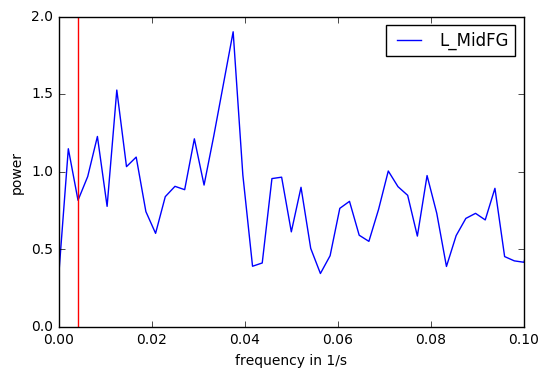

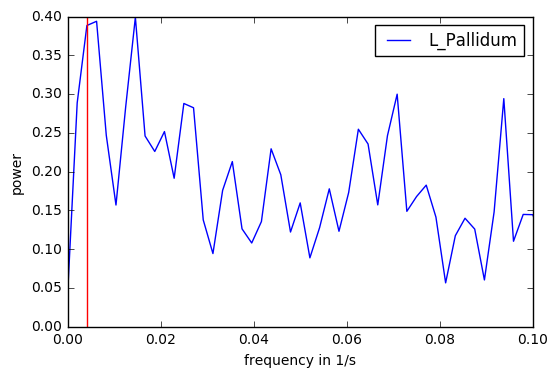

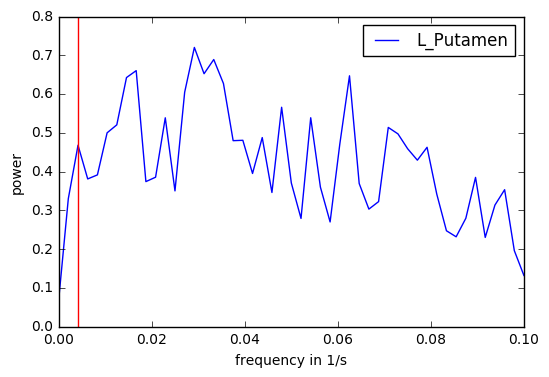

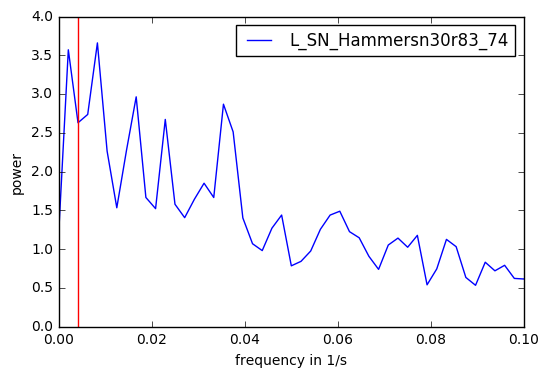

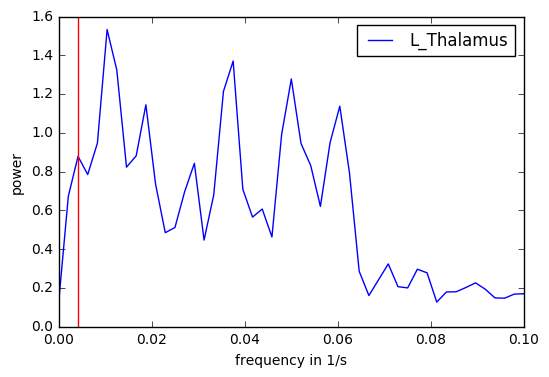

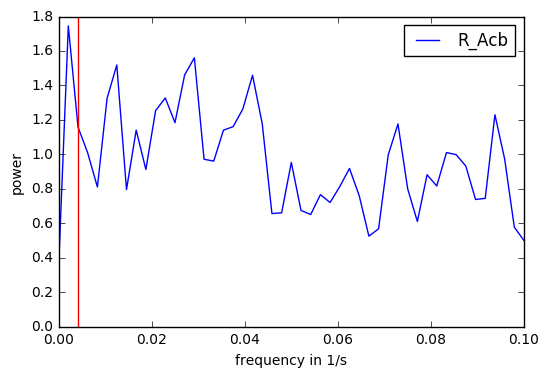

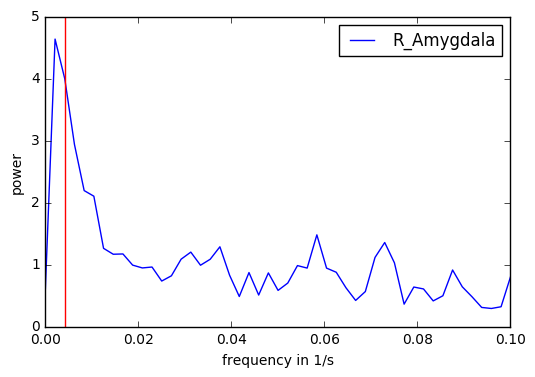

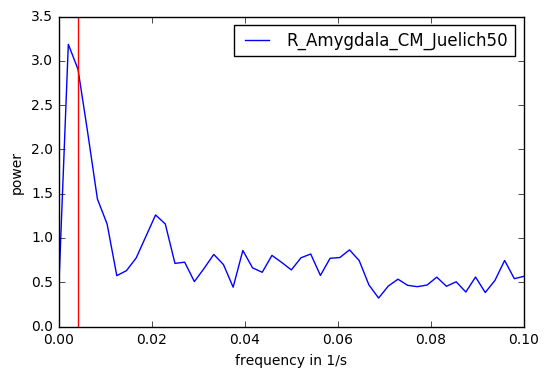

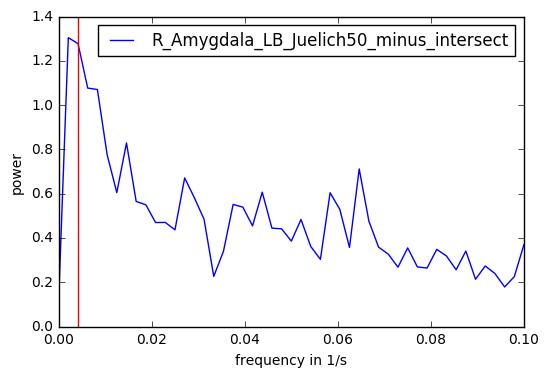

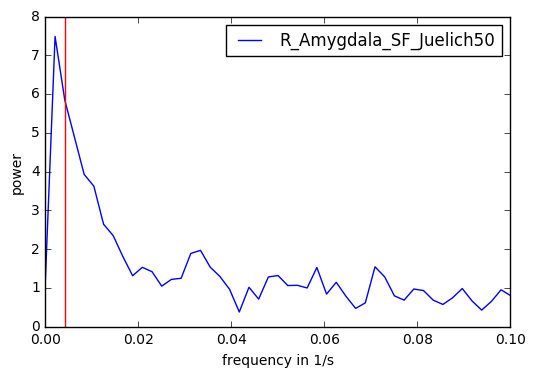

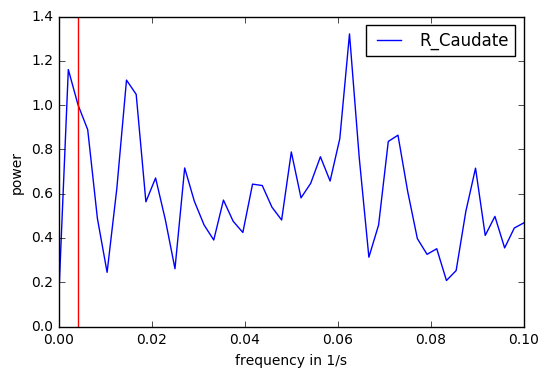

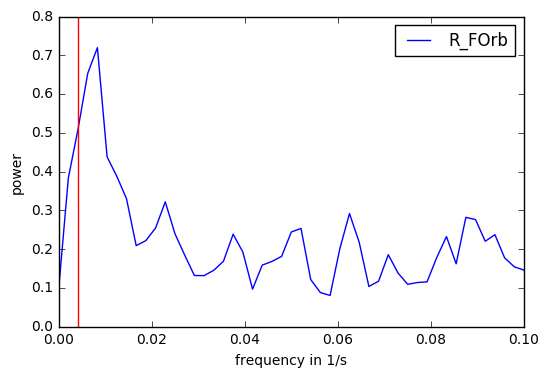

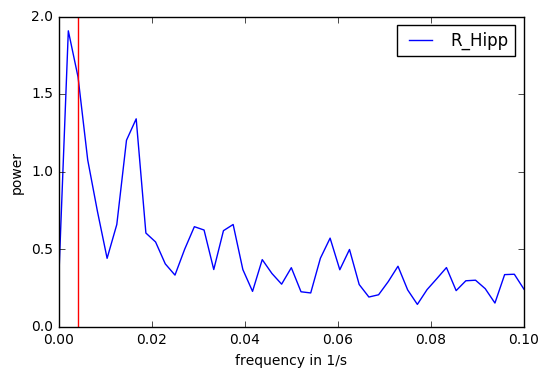

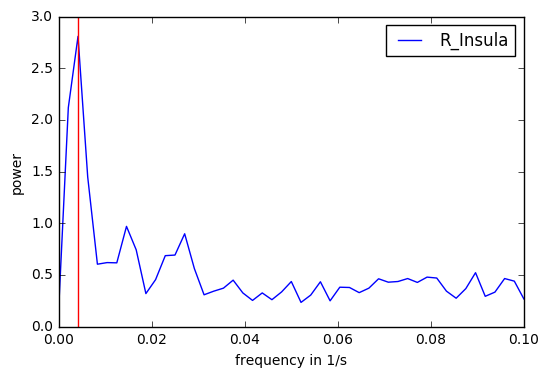

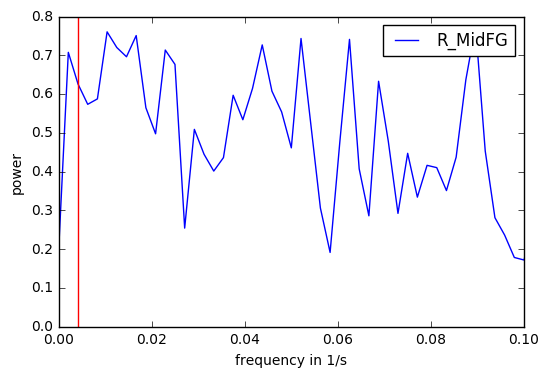

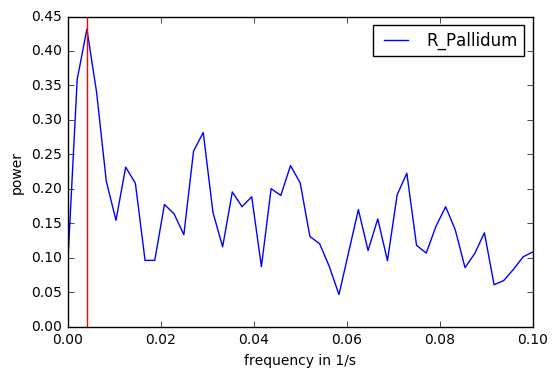

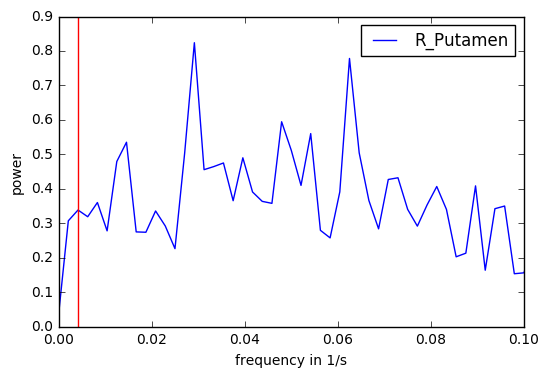

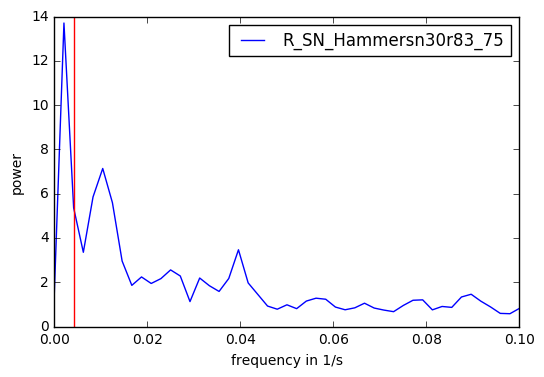

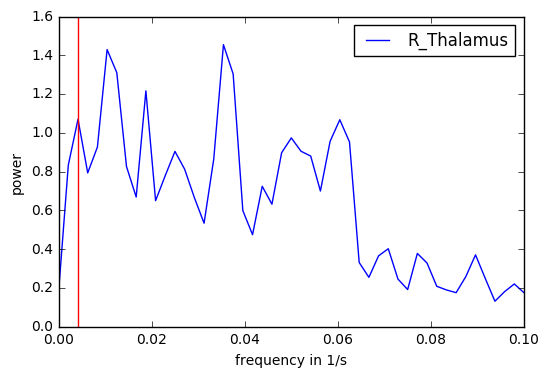

In [26]:
powerspectra = None
for region,roiname in zip(data_puffs_nofilter,roinames):
    f,ps = welch(region,fs=1/0.802,nperseg=598)
    plt.figure()
    plt.plot(f,ps,label=roiname[0])
    plt.xlim((0,0.1))
    plt.xlabel("frequency in 1/s")
    plt.ylabel("power")
    plt.axvline(x=1/240.0,color="r")
    plt.legend()
    if powerspectra is None:
        powerspectra  = ps
    else:
        powerspectra = np.vstack((powerspectra,ps))


In [27]:
print(f)

[ 0.          0.00208509  0.00417018  0.00625526  0.00834035  0.01042544
  0.01251053  0.01459562  0.01668071  0.01876579  0.02085088  0.02293597
  0.02502106  0.02710615  0.02919124  0.03127632  0.03336141  0.0354465
  0.03753159  0.03961668  0.04170177  0.04378685  0.04587194  0.04795703
  0.05004212  0.05212721  0.0542123   0.05629738  0.05838247  0.06046756
  0.06255265  0.06463774  0.06672283  0.06880791  0.070893    0.07297809
  0.07506318  0.07714827  0.07923335  0.08131844  0.08340353  0.08548862
  0.08757371  0.0896588   0.09174388  0.09382897  0.09591406  0.09799915
  0.10008424  0.10216933  0.10425441  0.1063395   0.10842459  0.11050968
  0.11259477  0.11467986  0.11676494  0.11885003  0.12093512  0.12302021
  0.1251053   0.12719039  0.12927547  0.13136056  0.13344565  0.13553074
  0.13761583  0.13970091  0.141786    0.14387109  0.14595618  0.14804127
  0.15012636  0.15221144  0.15429653  0.15638162  0.15846671  0.1605518
  0.16263689  0.16472197  0.16680706  0.16889215  0.1

In [28]:
totalpower=np.mean(powerspectra,axis=1)
print(totalpower.shape)
print(powerspectra.shape)
scaled_PS = np.divide(powerspectra.T,totalpower).T
print(scaled_PS.shape)

sorted_PS =scaled_PS[scaled_PS[:,2].argsort()[::-1]]
sorted_roinames = roinames[scaled_PS[:,2].argsort()[::-1]]
print(sorted_PS.shape)

(29,)
(29, 300)
(29, 300)
(29, 300)


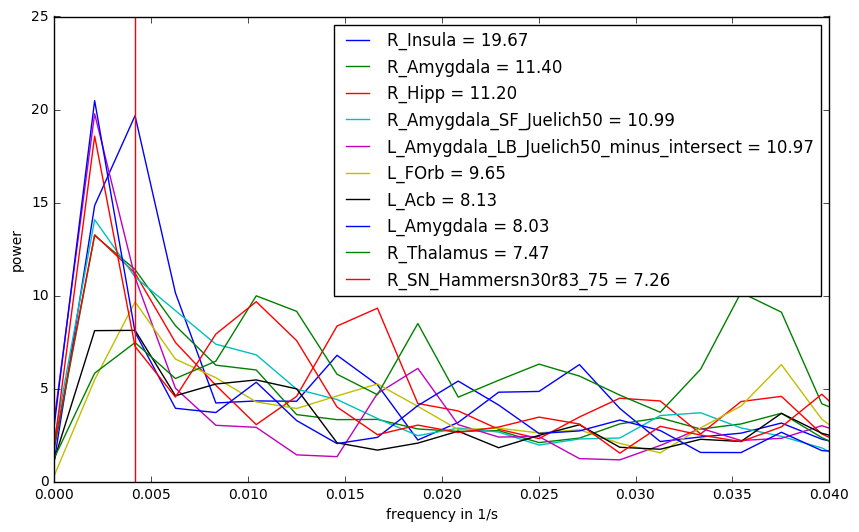

In [29]:
plt.figure(figsize=(10,6))
for spectra,roiname in zip(sorted_PS,sorted_roinames):
    if spectra[2] > 7:
        rel_strength = '{:2.2f}'.format(spectra[2])
        plt.plot(f,spectra,label=roiname[0]+" = "+rel_strength)
        plt.xlim((0,0.04))
    
plt.xlabel("frequency in 1/s")
plt.ylabel("power")
plt.axvline(x=1/240.0,color="r")
plt.legend()



In [30]:
for puff,pufftotal,roiname in zip(powerspectra.T[2],totalpower,roinames):
    print(puff,puff/pufftotal,roiname[0])

0.801813793602 5.65763313075 ACC
3.39115582534 8.12641865018 L_Acb
3.48389134145 8.02956284315 L_Amygdala
3.28821929876 4.86751282164 L_Amygdala_CM_Juelich50
3.14569153699 10.9728307115 L_Amygdala_LB_Juelich50_minus_intersect
5.46526789605 6.37778948251 L_Amygdala_SF_Juelich50
0.624873116784 3.84179978873 L_Caudate
0.546099387548 9.65444332969 L_FOrb
0.806278508928 6.38996022231 L_Hipp
0.929426054245 5.00767435547 L_Insula
0.814356912349 3.97806780875 L_MidFG
0.38837845239 3.2541453305 L_Pallidum
0.467828737239 3.81271377156 L_Putamen
2.62895427136 3.85137156477 L_SN_Hammersn30r83_74
0.877960913957 6.35967303762 L_Thalamus
1.15778407397 2.55140000621 R_Acb
3.99495814247 11.3983743725 R_Amygdala
2.90358742551 6.18208839985 R_Amygdala_CM_Juelich50
1.27750683187 6.80496534542 R_Amygdala_LB_Juelich50_minus_intersect
5.84524385611 10.9926174355 R_Amygdala_SF_Juelich50
1.00099455063 5.58070110292 R_Caudate
0.509015510539 6.68167203156 R_FOrb
1.61047901403 11.20071141 R_Hipp
2.80780255576 19.

In [31]:
for puff,roiname in zip(sorted_PS.T[2],sorted_roinames):
    print(puff,roiname[0])

19.6657382582 R_Insula
11.3983743725 R_Amygdala
11.20071141 R_Hipp
10.9926174355 R_Amygdala_SF_Juelich50
10.9728307115 L_Amygdala_LB_Juelich50_minus_intersect
9.65444332969 L_FOrb
8.12641865018 L_Acb
8.02956284315 L_Amygdala
7.47078879492 R_Thalamus
7.26022751248 R_SN_Hammersn30r83_75
6.80496534542 R_Amygdala_LB_Juelich50_minus_intersect
6.68167203156 R_FOrb
6.38996022231 L_Hipp
6.37778948251 L_Amygdala_SF_Juelich50
6.35967303762 L_Thalamus
6.18208839985 R_Amygdala_CM_Juelich50
5.65763313075 ACC
5.58070110292 R_Caudate
5.00767435547 L_Insula
4.86751282164 L_Amygdala_CM_Juelich50
4.79670368212 R_MidFG
3.97828106745 R_Pallidum
3.97806780875 L_MidFG
3.85137156477 L_SN_Hammersn30r83_74
3.84179978873 L_Caudate
3.81271377156 L_Putamen
3.2541453305 L_Pallidum
2.9653341793 R_Putamen
2.55140000621 R_Acb
